In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [69]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

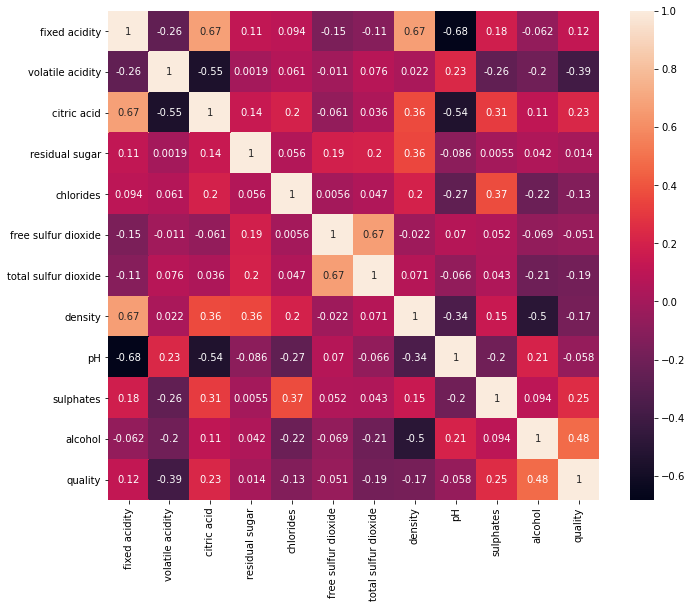

In [71]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True)

In [72]:
X = df.drop(columns='quality')
Y = df['quality']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [74]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print('w: ' + str(reg.coef_))
print('w0: ' + str(reg.intercept_))

w: [ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]
w0: 17.962578339232206


In [75]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

In [76]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('R-squared with the train set: ', metrics.r2_score(Y_train, Y_train_pred))
print('R-squared with the test set: ', metrics.r2_score(Y_test, Y_test_pred))

MAE: 0.5133956082451123
MSE: 0.41123487175042006
RMSE: 0.6412759715991393
R-squared with the train set:  0.36119824413213164
R-squared with the test set:  0.35138853325052344
